In [1]:
from adversarial.attacks import random_attack
from adversarial.utils import dataloader
from adversarial.models import TargetModel

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X_train, y_train, X_test, y_test = dataloader.load_data("data")

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(12894, 160, 160, 3) (12894,)
(500, 160, 160, 3) (500,)


In [4]:
epsilons = [0.3, 0.6, 0.9]
N = 5

In [5]:
target_model = TargetModel()
target_model.load_custom_weights_for_mobilenet("model/model_20200507_9_1.00_0.0088")

In [6]:
X_train_sample = X_train[np.random.randint(0, X_train.shape[0], size=N)]
y_train_sample = y_train[np.random.randint(0, X_train.shape[0], size=N)]

In [7]:
results = random_attack(target_model, X_train_sample, y_train_sample, epsilons)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


Origin:


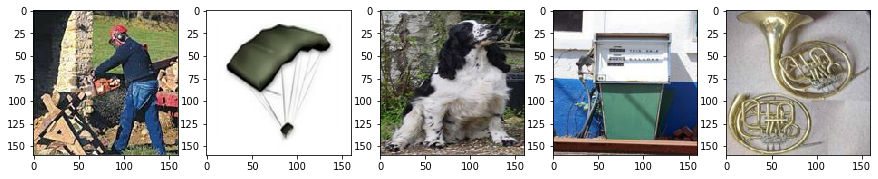

Adv:


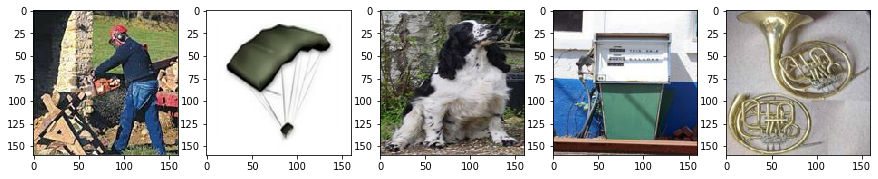

In [18]:
adv, _, success = results

print("Origin:")
plt.figure(figsize=(15, 3))

for i in range(N):
    plt.subplot(1, N, i+1)
    plt.imshow(X_train_sample[i])

plt.show()

print("Adv:")
plt.figure(figsize=(15, 3))

for i in range(N):
    plt.subplot(1, N, i+1)
    plt.imshow(adv[i].numpy())

plt.show()

In [16]:
print(success)

tf.Tensor([ True  True  True  True  True], shape=(5,), dtype=bool)
